### Exercise : 5 
#### Part :1 Regularized Linear Regression

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci

In [2]:
# Loading the dataset
data=sci.loadmat("ex5data1.mat")

In [3]:
# displaying the dataset
# train set
x_train=data["X"]
y_train=data["y"]

# test set
x_test=data["Xtest"]
y_test=data["ytest"]

# cross validation set
x_cv=data["Xval"]
y_cv=data["yval"]

In [4]:
# displaying the shape of the different types of datasets
print("shape of train set :",x_train.shape,y_train.shape)
print("shape of test set :",y_test.shape,y_test.shape)
print("shape of cross validation set :",x_cv.shape,y_cv.shape)

shape of train set : (12, 1) (12, 1)
shape of test set : (21, 1) (21, 1)
shape of cross validation set : (21, 1) (21, 1)


##### About dataset :
- features(1): change in the water level
- target(1)  : Amount of water flowing out of the dam 

##### Dataset is divided in to 3 parts
- A Training set is used to train the model
- A "Cross validation set" is used to determine the regularization parameter
- A "Test set" is used to evaluting performance of the model

##### 1. Visualizing the dataset

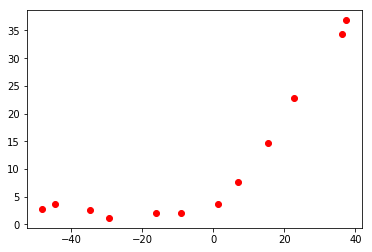

In [5]:
%matplotlib inline
plt.scatter(x_train,y_train,color="red")

##### 1.2) Regularized Linear cost function

In [6]:
def hypo(x_train,para,bias):
    return np.dot(x_train,para)+bias
def Regularized_Cost_function(x_train,y_train,para,bias,reg_term):
    m=x_train.shape[0]
    c=(1/(2*m))*sum((hypo(x_train,para,bias)-y_train)**2)+ (reg_term/(2*m))*sum(para**2)  
    return c

In [7]:
para=np.ones((1,1))
bias=1
reg_term=0.2
error=Regularized_Cost_function(x_train,y_train,para,bias,reg_term)

In [8]:
print(error)

[303.95985889]


##### 1.3) Regularized linear regression gradient

In [9]:
def Gradient_descent(x_train,y_train,para,bias,learning_rate,reg_term):
    num_iter=2000
    m=x_train.shape[0]
    for _ in range(num_iter):
        pre=hypo(x_train,para,bias)
        tre=pre-y_train
        para=para-(learning_rate/m)*((np.dot(x_train.T,tre))+reg_term*sum(para))
        bias=bias-((learning_rate/m)*(sum(tre)))
    return bias,para

In [10]:
learning_rate=0.001
reg_term=0
b,p=Gradient_descent(x_train,y_train,para,bias,learning_rate,reg_term)

In [11]:
print(Regularized_Cost_function(x_train,y_train,p,b,reg_term))

[23.8358144]


##### 1.4)Fitting the data in to the model

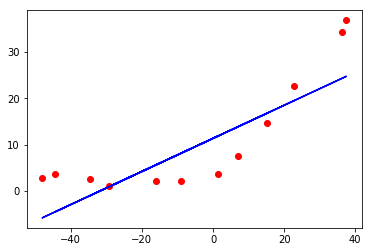

In [12]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,hypo(x_train,p,b),color="blue")

##### 1.5) Bias - Variance